In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/processed/security_incidents_clean.csv")

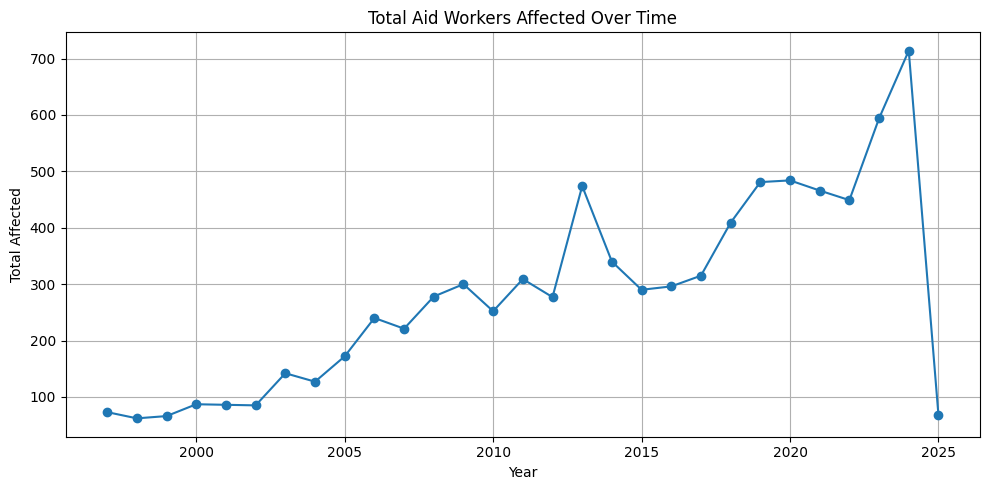

In [8]:
import matplotlib.pyplot as plt

# Group by year and sum total affected
yearly_totals = df.groupby('Year')['Total affected'].sum().reset_index()

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_totals['Year'], yearly_totals['Total affected'], marker='o')
plt.title('Total Aid Workers Affected Over Time')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Group by Year and Country, summing the total affected
grouped = df.groupby(['Year', 'Country'])['Total affected'].sum().reset_index()

# Sort within each year and get top 3 countries
top3_per_year = grouped.sort_values(['Year', 'Total affected'], ascending=[True, False]) \
                       .groupby('Year').head(3)

# Create list of tuples (Country, Total Affected) for each year
top3_list = top3_per_year.groupby('Year').apply(
    lambda x: list(zip(x['Country'], x['Total affected']))
).reset_index(name='Top 3 Countries with Counts')

# Display result
top3_list


,Year,Top 3 Countries with Counts
0,1997,"[(Chechnya, 15), (Somalia, 15), (DR Congo, 10)]"
1,1998,"[(Somalia, 18), (Kosovo, 7), (Sudan, 7)]"
2,1999,"[(Angola, 13), (Somalia, 10), (Sudan, 9)]"
3,2000,"[(Somalia, 16), (Sudan, 15), (Indonesia, 10)]"
4,2001,"[(Somalia, 19), (Burundi, 15), (Tajikistan, 15)]"
5,2002,"[(Angola, 14), (Chechnya, 11), (Occupied Pales..."
6,2003,"[(Iraq, 49), (Afghanistan, 22), (Sudan, 11)]"
7,2004,"[(Afghanistan, 40), (Iraq, 32), (Sudan, 23)]"
8,2005,"[(Sudan, 73), (Afghanistan, 35), (Somalia, 12)]"
9,2006,"[(Sudan, 87), (Afghanistan, 55), (Sri Lanka, 25)]"
